<a href="https://colab.research.google.com/github/madhulathachavali/AIML/blob/main/Breast_Cancer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim of the project to analyze breast cancer dataset using exploratory data analysis and principal component analysis 

Data Source: UIC machine learning data base.This dataset has 11 atrributes including patient ID and class.

Independent Variables: ClumpThickness	Cell Size	Cell Shape	Marginal Adhesion	Single Epithelial Cell Size	Bare Nuclei	Normal Nucleoli	Bland Chromatin	Mitoses	
Target Variable: Class (2 -Benign and 4 -Malignant)

**Import libraries and Load the Data**

In [198]:
# Load the necessary packages
import numpy as np                                    
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [199]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
# Change directory when needed
data_path ="/content/drive/My Drive/Data/bc2.csv"

In [201]:
data=pd.DataFrame(pd.read_csv(data_path))

**Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis**

In [202]:
data.head(20)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


This dataset has class 2 (Benign) and 4 (Malignant). Let's replace 2 with label 0 (Benign) and 4 with label 1 (Malignant) for convenience in model building steps

In [203]:
data['Class'].replace(2,0, inplace=True)

In [204]:
data['Class'].replace(4,1, inplace=True)

In [205]:
data.shape

(699, 11)

This dataset has 11 variables and 699 obervations including Patient ID and Class

In [206]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

Bare nuclei is taken as object type even though it has numerical values

In [207]:
data.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


**Check for missing value check, incorrect data, duplicate data and missing value imputation.**

In [208]:
data['Bare Nuclei'].unique() # '?' should be removed from Bare Nuclei column

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [209]:
# Check for missing value in any other column
data.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

There are no missing values in the data. We can impute barenuclei with '?' with highest class bare nuclei value.

In [210]:
# count the rows having ?
data[data['Bare Nuclei']=="?"].count()


ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [211]:
data['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

16 values have '?' We can delete them as it forms roughly 2% of data.
For now, lets impute with highest Bare nuclei value class

In [212]:
# We would impute by using mode (we can also look for advane imputation such as knn imputation in fancyimpute package)
data['Bare Nuclei'].replace("?",'1', inplace=True)
data['Bare Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [213]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype('int64') # change object data to int64 as it will be helpful for model building

In [214]:
# Checking for duplicate data
data.duplicated().sum()

9

In [215]:
# duplicated obervations
duplicates=data.duplicated()
data[duplicates]
# To check for duplicates by column
#pd.concat(g for _, g in data_df.groupby("ID") if len(g) > 1).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,0
253,1100524,6,10,10,2,8,10,7,3,3,1
254,1116116,9,10,10,1,10,8,3,3,1,1
258,1198641,3,1,1,1,2,1,3,1,1,0
272,320675,3,3,5,2,3,10,7,1,1,1
322,733639,3,1,1,1,2,1,3,1,1,0
338,704097,1,1,1,1,1,1,2,1,1,0
561,1321942,5,1,1,1,2,1,3,1,1,0
684,466906,1,1,1,1,2,1,1,1,1,0


In [216]:
# Remove duplicate observations
data.drop_duplicates(subset = None, keep = 'first', inplace=True)

In [217]:
data.shape

(690, 11)

We have 690 obervations after dropping the duplicated observations

In [218]:
# Drop ID any it will not provide any information
data=data.drop(['ID'], axis=1)
data.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


**Bivariate analysis**

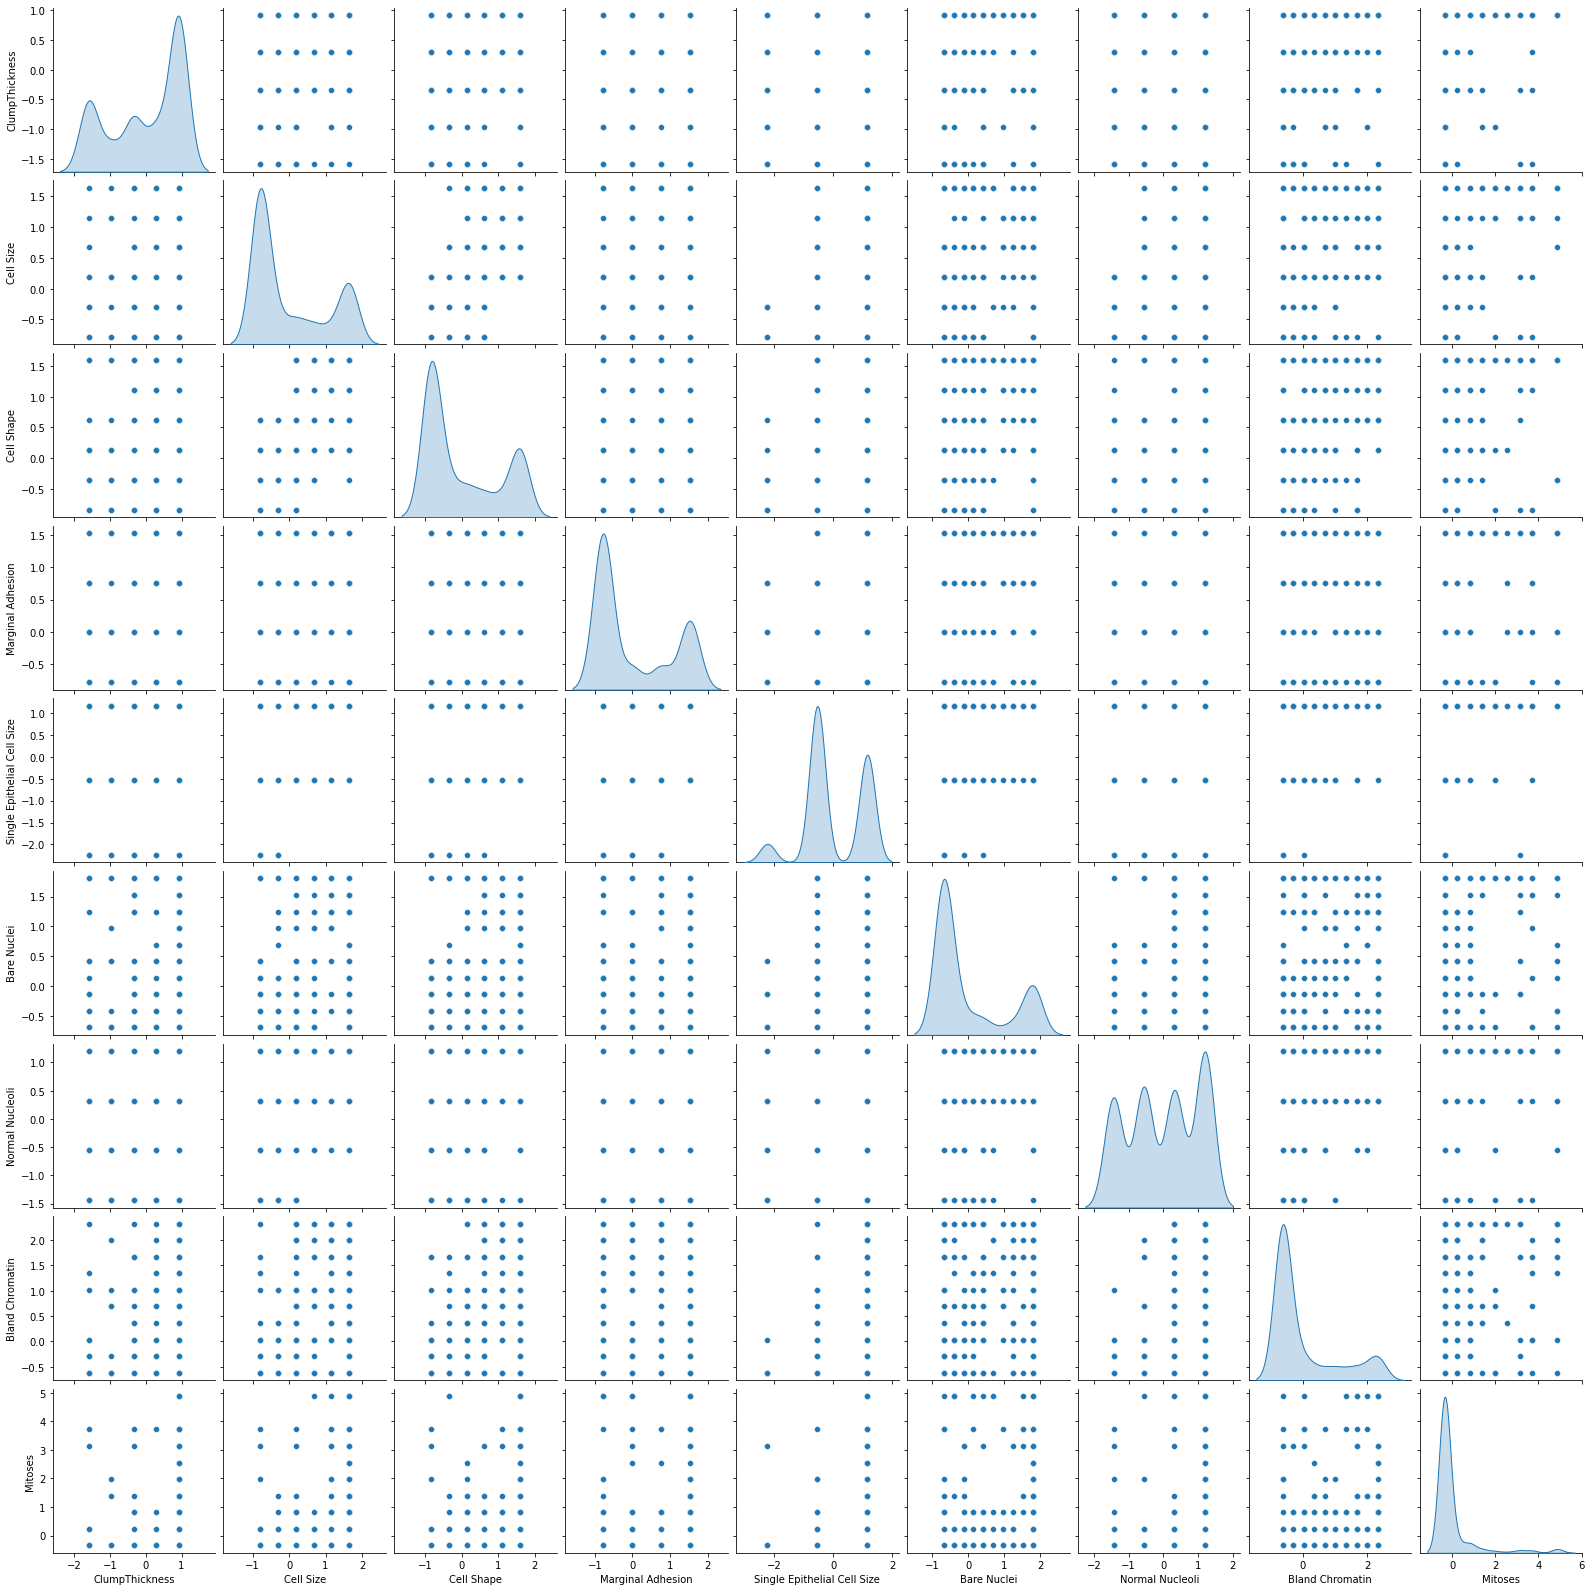

In [219]:
sns.pairplot(data_new,diag_kind='kde')

In [220]:
data.corr(method='pearson')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947
Class,0.716812,0.817586,0.817551,0.701175,0.681063,0.816655,0.756736,0.715363,0.423947,1.000000


Cell Size shows high significance with Cell shape (0.9), Marginal Adhesion (0.7), Single Epithelial Cell Size (0.7), Bare Nuclei (0.7), normal nucleoli (0.7), and bland chromatin (0.7)

In [221]:
data.value_counts(data["Class"])

Class
0    452
1    238
dtype: int64

Class 2 has twice the number of values compared to class 4. The dataset is imbalanced.

**Marginal Adhesion**

In [222]:
#Group few levels
pd.crosstab(data['Marginal Adhesion'], data['Class'])

Class,0,1
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


Benign cases are seen in categories 1, 2 and 3 than rest of the categories. Category 4 and above clubbed together for model building.
Malignant cases are mostly seen at and after category 4. 


In [223]:
data['Marginal Adhesion'] = np.where(data['Marginal Adhesion'] >4, 4, data['Marginal Adhesion'])
data['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

**Single Epithelial Cell Size**

In [224]:
pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,0,1
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


Similarly, benign cases are mostly seen in category 1, 2 and 3. Malignant cases have larger Single Epithelial Cell Size (size 4 and above) compared to benign class.
Single Epithelial Cell Size with 4 and above can be clubbed. 

In [225]:
data['Single Epithelial Cell Size'] = np.where(data['Single Epithelial Cell Size'] >3, 3, data['Single Epithelial Cell Size'])

In [226]:
pd.crosstab(data['Single Epithelial Cell Size'], data['Class'])

Class,0,1
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,49,214


**Normal Nucleoli**

In [227]:
pd.crosstab(data['Normal Nucleoli'], data['Class'])

Class,0,1
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


 Malignant Class: Two important points to be noted for normal nuclei

1. Less number of normal cells in 1,2,3
2. More cells in 4 and above

Opposite is observed for benign class

In [228]:
# Clubbing levels 4 and above together
data['Normal Nucleoli'] = np.where(data['Normal Nucleoli'] >4, 4, data['Normal Nucleoli'])

In [229]:
data['Normal Nucleoli'].value_counts()

4    214
2    165
3    160
1    151
Name: Normal Nucleoli, dtype: int64

**Bland Chromatin**

In [230]:
pd.crosstab(data['Bland Chromatin'], data['Class'])

Class,0,1
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In malignant class, more observations with Bland Chromatin (3 and above) compared to benign class.

In [231]:
# Clubbing levels 3 and above together
data['Bland Chromatin'] = np.where(data['Bland Chromatin'] >3, 3, data['Bland Chromatin'])
pd.crosstab(data['Bland Chromatin'], data['Class'])

Class,0,1
Bland Chromatin,,
1,396,40
2,30,6
3,26,192


**Mitoses**

In [232]:
pd.crosstab(data['Mitoses'], data['Class'])

Class,0,1
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


Most of the benign cases are in category 1. Very few observed in 2 and after. For malignant class, most of the cases seen in 1, 2, 3, 4 categories. For this variable cut off should be at 1. Category 2 and above should be clubbed for modeling.


In [233]:
# Clubbing levels 2 and above together
data['Mitoses'] = np.where(data['Mitoses'] >2, 2, data['Mitoses'])
pd.crosstab(data['Mitoses'], data['Class'])

Class,0,1
Mitoses,,
1,439,132
2,13,106


**ClumpThickness**

In [234]:
pd.crosstab(data['ClumpThickness'], data['Class'])

Class,0,1
ClumpThickness,,
1,139,3
2,46,4
3,94,11
4,68,12
5,84,45
6,16,17
7,1,22
8,4,42
9,0,13


Benign cases seen in all categories. Whereas in malignant class, the clump thickness is less for first four categories.

In [235]:
# Clubbing levels 4 and above together
data['ClumpThickness'] = np.where(data['ClumpThickness'] >4, 4, data['ClumpThickness'])

In [236]:
pd.crosstab(data['ClumpThickness'], data['Class'])

Class,0,1
ClumpThickness,,
1,139,3
2,46,4
3,94,11
4,173,220


**Cell Size**

In [237]:
pd.crosstab(data['Cell Size'], data['Class'])

Class,0,1
Cell Size,,
1,374,4
2,37,8
3,27,24
4,9,31
5,0,30
6,2,25
7,1,18
8,1,28
9,1,5


Cell size for benign is observed for first 3 categories and not much after 4. Opposite is oberved for malignant class. 

In [238]:
# Clubbing levels 3 and above together
data['Cell Size'] = np.where(data['Cell Size'] >3, 3, data['Cell Size'])

In [239]:
pd.crosstab(data['Cell Size'], data['Class'])

Class,0,1
Cell Size,,
1,374,4
2,37,8
3,41,226


**Cell Shape**

In [240]:
pd.crosstab(data['Cell Shape'], data['Class'])

Class,0,1
Cell Shape,,
1,345,2
2,52,7
3,33,23
4,13,31
5,3,30
6,3,27
7,2,28
8,1,27
9,0,7


Most of the benign cases are in 1, 2 and 3 categories. Malignant cases are higher in 3 and above, especially high in category 5.

In [241]:
# Clubbing levels 3 and above together
data['Cell Shape'] = np.where(data['Cell Shape'] >3, 3, data['Cell Shape'])

In [242]:
pd.crosstab(data['Cell Shape'], data['Class'])

Class,0,1
Cell Shape,,
1,345,2
2,52,7
3,55,229


**Bare Nuclei**

In [243]:
pd.crosstab(data['Bare Nuclei'], data['Class'])

Class,0,1
Bare Nuclei,,
1,395,17
2,21,9
3,14,14
4,6,13
5,10,20
6,0,4
7,1,7
8,2,18
9,0,9


Most of the benign cases are in category 1 followed by 2 and 3. Malignant cases are higher in 3 and above, especially high in category 10.

In [244]:
# Clubbing levels 3 and above together
data['Bare Nuclei'] = np.where(data['Bare Nuclei'] >3, 3, data['Bare Nuclei'])

In [245]:
pd.crosstab(data['Bare Nuclei'], data['Class'])

Class,0,1
Bare Nuclei,,
1,395,17
2,21,9
3,36,212


**Remove Outliers and scaling**
We will perform normalization using z score


Lets separate independent and dependent variables

In [246]:
# independant variables
X=data.drop(['Class'], axis=1)
X.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,4,1,1,1,2,1,3,1,1
1,4,3,3,4,3,3,3,2,1
2,3,1,1,1,2,2,3,1,1
3,4,3,3,1,3,3,3,3,1
4,4,1,1,3,2,1,3,1,1


In [247]:
# the dependent variable
y = data[['Class']]

In [248]:
XScaled=X.apply(zscore)
XScaled.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.757383,-0.880178,-0.954590,-0.781803,-0.536685,-0.803541,0.322808,-0.742837,-0.456515
1,0.757383,1.217656,1.146422,1.530101,1.161998,1.304609,0.322808,0.343090,-0.456515
2,-0.070817,-0.880178,-0.954590,-0.781803,-0.536685,0.250534,0.322808,-0.742837,-0.456515
3,0.757383,1.217656,1.146422,-0.781803,1.161998,1.304609,0.322808,1.429016,-0.456515
4,0.757383,-0.880178,-0.954590,0.759466,-0.536685,-0.803541,0.322808,-0.742837,-0.456515


**Model Building using Logistic Regression**

In [260]:
# Create the training and test data set in the ratio of 70:30 respectively. 

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=7)

# Random state seeding for reapeatability of the code

In [261]:
from sklearn.linear_model import LogisticRegression   # importing logistic regression from scikit learn

model = LogisticRegression(random_state=7)  #assigning a variable for the algorithm

model.fit(xtrain, ytrain) #training of model

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=7)

In [262]:
y_predict = model.predict(xtest)     #model is predicting y values based on test dataset given to the model

print("Trainig accuracy",model.score(xtrain,ytrain))  # training accuracy 
print()
print("Testing accuracy",model.score(xtest, ytest))   # testing accuracy

Trainig accuracy 0.968944099378882

Testing accuracy 0.9710144927536232


In [263]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score

## for evaluating model performance

In [264]:
## confusion matrix 
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

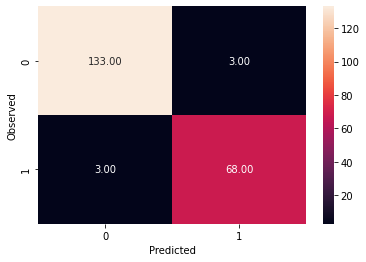

In [265]:
draw_cm(ytest,y_predict)

In [266]:
recall_score(ytest,y_predict)

0.9577464788732394

In [267]:
precision_score(ytest,y_predict)

0.9577464788732394

In [268]:
f1_score(ytest,y_predict)

0.9577464788732394

In [269]:
roc_auc_score(ytest,y_predict)

0.9678438276719138

In [270]:
# We have 6 obervations where predicted and observed classes are different

z = xtest.copy()
z['Observed Class'] = ytest
z['Predicted Class'] = y_predict
z[z['Observed Class']!=z['Predicted Class']]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Observed Class,Predicted Class
415,3,3,2,4,3,3,3,3,1,0,1
326,4,1,1,1,2,3,4,3,1,1,0
222,4,1,1,3,1,3,2,1,1,1,0
296,4,3,3,3,3,3,4,3,1,0,1
3,4,3,3,1,3,3,3,3,1,0,1
101,2,3,3,4,2,3,2,3,1,1,0


There are only 6 obervations where predicted class is different from observed class

** Confusion matrix means**

True Positive (observed=1,predicted=1): 68

Predicted that class will be malignant and it is malignant

False Positive (observed=0,predicted=1): 3

Predicted that class will be malignant and it is not malignant

True Negative (observed=0,predicted=0): 133

Predicted that class will not be malignant and it is not malignant

False Negative (observed=1,predicted=0): 3

Predicted that class will not be malignant and it is malignant

**Conclusion**

***Benign versus Malignant Features***

1.   Marginal Adhesion: Benign cases are seen in categories 1, 2 and 3 than rest of the categories. Category 4 and above clubbed together for model building. Malignant cases are mostly seen at and after category 4. 

2.  Single Epithelial Cell Size: Similarly, benign cases are mostly seen in category 1, 2 and 3. Malignant cases have larger Single Epithelial Cell Size (size 4 and above) compared to benign class.
Single Epithelial Cell Size with 4 and above can be clubbed. 

3. Normal Nuclei: Two important points to be noted for normal nuclei.
Malignant class showed Less number of normal cells in 1,2,3 and More cells in 4 and above
Opposite is observed for benign class

4. Bland Chromatin
Most of the malignant cases seen in category 3 and above compared to benign class

5. Mitosis: Most of the benign cases are in category 1. Very few observed in 2 and after. For malignant class, most of the cases seen in 1, 2, 3, 4 categories. For this variable cut off should be at 1. Category 2 and above should be clubbed for modeling.

6. CLump Thickness: Benign cases seen in all categories. Whereas in malignant class, the clump thickness is less for first four categories.

7. Cell Size: Most of the benign cases seen in categories 1, 2, 3, and not much after 4. Opposite is oberved for malignant class.

8. Cell Shape: Most of the benign cases are seen in categories 1, 2 and 3. Malignant cases are higher in 3 and above, especially high in category 5.
9. Bare Nuclei: Most of the benign cases are in category 1 followed by 2 and 3. Malignant cases are higher in 3 and above, especially high in category 10.
 

***Model Building***

For model building, all variables from orginal dataset are used. Number of categories for each variables are significantly reduced by grouping into 2 or 3 or 4 clusters appropriately. This will simplify classification process and improve model accuracy.

The model is built using logistic regression (accuracy score of 96% on train data and 97% on test data) with highest importance given to recall as it is essential to detect every positive case. 

*   Recall 96%
*   Precision 96%
*   f1 score 96%
*   ROC AUC 97%

**Appendix**

warnings.filterwarnings("ignore") : Never print matching warnings.

Pandas : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

Numpy : The fundamental package for scientific computing with Python.

Matplotlib : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Seaborn : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

pairplot : Plot pairwise relationships in a dataset.

heatmap : Draw a heatmap of rectangular data as a color-encoded matrix.

distplot : Flexibly plot a univariate distribution of observations.

pandas.DataFrame.corr : Compute pairwise correlation of columns, excluding NA/null values.

scikit-learn: sklearn is an open source library providing tools for  predictive data analysis 
